In [1]:
!pip install seaborn==0.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# from google.colab import drive
# drive.mount('/gdrive')

In [3]:
%ls drive

MyDrive/


In [4]:
%cd drive/MyDrive/'Colab Notebooks'/'Alura - validacao'/

/content/drive/MyDrive/Colab Notebooks/Alura - validacao


In [5]:
from modelos import Modelos 
from modelos import Explorador

In [6]:
import pandas as pd
import numpy as np

In [7]:
URI="https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
df = pd.read_csv(URI).drop(columns=["Unnamed: 0"], axis=1)
df['modelo'] = df.idade_do_modelo + np.random.randint(-2, 3, size=10000)
df.modelo = df.modelo + abs(df.modelo.min()) + 1

In [8]:
x = df[["preco", "idade_do_modelo", "km_por_ano", "modelo"]]
y = df["vendido"]

SEED = 158020

In [9]:
dados_azar = df.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano", "modelo"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
4999,74023.29,0,12,24812.80412,13
5322,84843.49,0,13,23095.63834,15
5319,83100.27,0,19,36240.72746,23
5316,87932.13,0,16,32249.56426,16
5315,77937.01,0,15,28414.50704,16


In [10]:
modelos = Modelos(SEED, x, y)
# explorador = Explorador(SEED, espaco_de_parametros, x, y)

In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedKFold

#  cvStratifiedKFold = StratifiedKFold(**kwargs)
cvKFold           = KFold(n_splits = 10)
cvGroupKFold      = GroupKFold(n_splits = 10)

In [12]:
import seaborn as sns
import matplotlib as plt

# Árvore de Decisão - Explorando hiper parâmetros em 2 dimensões

In [13]:
def busca_2d(min_samples_leafs):
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in min_samples_leafs:
      tabela = modelos.arvore_decisao_2d(cvKFold, df.modelo, max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados)
  return resultados


In [14]:
resultados_2d = busca_2d([32, 64, 128, 256])
resultados_2d.head()

,MAX_DEPTH,MIN_SAMPLES_LEAF,train_score,test_score
0,1,32,75.791111,75.78
1,1,64,75.791111,75.78
2,1,128,75.791111,75.78
3,1,256,75.791111,75.78
4,2,32,75.791111,75.78


In [15]:
resultados_2d.sort_values("test_score", ascending=False).head()

,MAX_DEPTH,MIN_SAMPLES_LEAF,train_score,test_score
10,3,128,78.751111,78.69
15,4,256,78.751111,78.69
14,4,128,78.751111,78.69
13,4,64,78.751111,78.69
11,3,256,78.751111,78.69


In [16]:
corr = resultados_2d.corr()

In [17]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


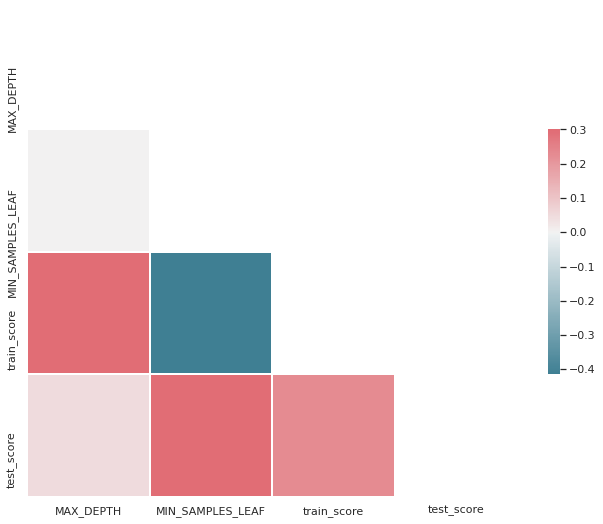

In [18]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10,  n=200, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
resultados_2d = busca_2d([128, 192, 256, 512])
resultados_2d.head()

,MAX_DEPTH,MIN_SAMPLES_LEAF,train_score,test_score
0,1,128,75.791111,75.78
1,1,192,75.791111,75.78
2,1,256,75.791111,75.78
3,1,512,75.791111,75.78
4,2,128,75.791111,75.78


In [20]:
resultados_2d.sort_values("test_score", ascending=False).head()

,MAX_DEPTH,MIN_SAMPLES_LEAF,train_score,test_score
12,4,128,78.751111,78.69
10,3,256,78.751111,78.69
14,4,256,78.751111,78.69
13,4,192,78.751111,78.69
8,3,128,78.751111,78.69


In [21]:
corr = resultados_2d.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


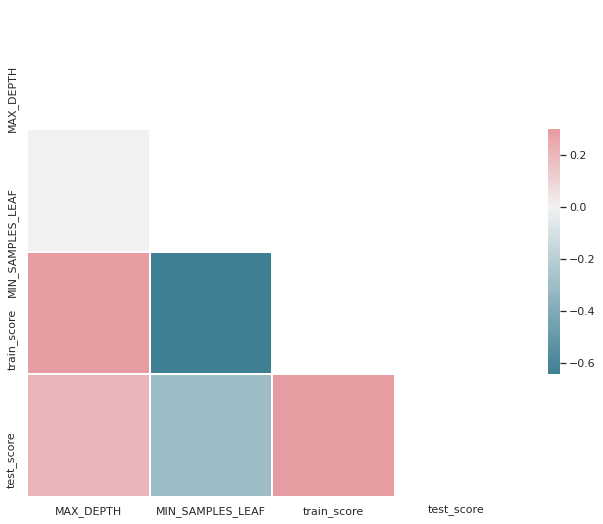

In [22]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10,  n=200, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Árvore de Decisão - Explorando hiper parâmetros em 3 dimensões

In [23]:
def busca_3d(min_samples_leafs, min_samples_splits):
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in min_samples_leafs:
      for min_samples_split in min_samples_splits:
        tabela = modelos.arvore_decisao_3d(cvKFold, df.modelo, max_depth, min_samples_leaf, min_samples_split)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados)
  return resultados

In [24]:
resultados_3d = busca_3d([32, 64, 128, 256], [32, 64, 128, 256])
resultados_3d.head()

,MAX_DEPTH,MIN_SAMPLES_LEAF,train_score,test_score,fit_time,score_time
0,1,32,75.791111,75.78,0.007128,0.002045
1,1,32,75.791111,75.78,0.006483,0.001938
2,1,32,75.791111,75.78,0.006754,0.002058
3,1,32,75.791111,75.78,0.006464,0.001841
4,1,64,75.791111,75.78,0.006900,0.002187


In [25]:
resultados_3d.sort_values("test_score", ascending=False).head()

,MAX_DEPTH,MIN_SAMPLES_LEAF,train_score,test_score,fit_time,score_time
45,3,256,78.751111,78.69,0.011833,0.002067
35,3,32,78.751111,78.69,0.012413,0.002219
56,4,128,78.751111,78.69,0.014014,0.002110
55,4,64,78.751111,78.69,0.014172,0.002182
54,4,64,78.751111,78.69,0.014426,0.002154


In [26]:
corr = resultados_3d.corr()

In [27]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


# Comparando GridSearchCV com RandomizedSearch, busca aleatória

## Grid

In [28]:
import time
from scipy.stats import randint
from sklearn.model_selection import cross_val_score

In [29]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [30]:
espaco_de_parametros = {
    "n_estimators" : [10, 100],
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "bootstrap" : [True, False],
    "criterion" : ["gini", "entropy"]
}

tic = time.time()
explorador = Explorador(SEED, espaco_de_parametros, x_azar, y_azar)
busca = explorador.busca_grid(KFold(n_splits = 5, shuffle=True), x.modelo)
tac = time.time()

print((tac - tic) * (-1))

resultado = pd.DataFrame(busca.cv_results_)
resultado.head()

-302.5866734981537


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.055456,0.003229,0.005146,0.000165,True,gini,3,32,32,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7775,0.7810,0.7640,0.7670,0.7750,0.7729,0.006406,135
1,0.488236,0.007642,0.028557,0.001452,True,gini,3,32,32,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7925,0.7805,0.7620,0.7670,0.7765,0.7757,0.010671,90
2,0.051523,0.005187,0.005171,0.000198,True,gini,3,32,64,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7760,0.7805,0.7740,0.7665,0.7875,0.7769,0.006967,79
3,0.480489,0.012548,0.026795,0.000663,True,gini,3,32,64,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7925,0.7810,0.7590,0.7660,0.7760,0.7749,0.011664,112
4,0.051832,0.002644,0.005161,0.000162,True,gini,3,32,128,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.8030,0.7850,0.7685,0.7655,0.7595,0.7763,0.015801,83


In [31]:
resultados_ordenados_pela_media = resultado.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.787 +-(0.022) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 64, 'n_estimators': 100}
0.787 +-(0.022) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 64, 'n_estimators': 100}
0.787 +-(0.023) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 32, 'n_estimators': 100}
0.787 +-(0.022) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 100}
0.787 +-(0.022) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 32, 'n_estimators': 100}


In [32]:
tic = time.time()
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Tempo 1269.10 segundos
Accuracy médio 78.65
Intervalo [77.22, 80.08]
RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_leaf=32,
                       min_samples_split=64)


## Random

In [33]:
espaco_de_parametros = {
    "n_estimators" :randint(10, 101),
    "max_depth" : randint(3, 6),
    "min_samples_split" : randint(32, 129),
    "min_samples_leaf" : randint(32, 129),
    "bootstrap" : [True, False],
    "criterion" : ["gini", "entropy"]
}

tic = time.time()
explorador = Explorador(SEED, espaco_de_parametros, x_azar, y_azar)
busca = explorador.busca_random_iter(KFold(n_splits = 20, shuffle=True), 80)
tac = time.time()

print((tac - tic) * (-1))

resultado = pd.DataFrame(busca.cv_results_)
resultado.head()

-761.5766170024872


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,0.556076,0.006732,0.012657,0.002827,False,gini,5,50,113,58,...,0.798,0.756,0.776,0.782,0.764,0.792,0.770,0.7870,0.017326,3
1,0.447091,0.013214,0.008193,0.000598,False,entropy,5,113,43,35,...,0.798,0.758,0.768,0.784,0.762,0.792,0.768,0.7858,0.018405,17
2,0.369776,0.008899,0.010981,0.000592,True,gini,4,95,95,57,...,0.794,0.750,0.772,0.780,0.758,0.774,0.770,0.7812,0.017360,36
3,0.262213,0.006702,0.009043,0.001270,True,gini,4,85,52,40,...,0.796,0.758,0.758,0.782,0.750,0.788,0.762,0.7817,0.019993,33
4,0.502085,0.011175,0.010782,0.000824,False,entropy,3,114,122,55,...,0.798,0.752,0.754,0.780,0.750,0.774,0.766,0.7750,0.018105,70


In [34]:
resultados_ordenados_pela_media = resultado.sort_values("mean_test_score", ascending=False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (linha.mean_test_score, linha.std_test_score*2, linha.params))

0.787 +-(0.033) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 34, 'min_samples_split': 121, 'n_estimators': 81}
0.787 +-(0.033) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 65, 'n_estimators': 54}
0.787 +-(0.033) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 107, 'min_samples_split': 117, 'n_estimators': 92}
0.787 +-(0.033) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 83, 'min_samples_split': 35, 'n_estimators': 95}
0.787 +-(0.035) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 113, 'n_estimators': 58}
